In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [16]:
def f(x,y):
    return (3-x)**2 + 20*((y - x**2)**2)

In [17]:
def df_dx(x,y) :
    return -2*(3-x) - 80*(y-x**2)*x

def df_dy(x,y) :
    return 40*(y-x**2)

def d2f_dy2(x,y) :
    return 40

def d2f_dx2(x,y) :
    return 2 + 80*(3*(x**2)-y)

def d2f_dxdy(x,y) :
    return -80*x


In [18]:
def hess(x,y) :
    return np.array([[d2f_dx2(x,y) , d2f_dxdy(x,y)],
                      [d2f_dxdy(x,y) , d2f_dy2(x,y)]])

def grad(x,y) :
    return np.array([df_dx(x,y),df_dy(x,y)])

def hess_inv(x,y) :
    return np.linalg.inv(hess(x,y))

def sub_term(x,y) :
    return np.dot(hess_inv(x,y), np.transpose(grad(x,y)))



In [19]:
def L2Norm(x,y) :
    grad_x = df_dx(x,y);
    grad_y = df_dy(x,y);
    return np.sqrt(grad_x**2 + grad_y**2)

def tolerance(p) :
    return 10 ** (-1*p)

In [20]:
def gradient_descent(x_start , y_start ) :
    tablelist=[]
    tau_values = []
    iteration_counts = []

    for i in range (19) :

        x = x_start
        y = y_start

        history =[]
        count = 0
        norm = L2Norm(x,y)
        TLevel = tolerance(i+1)

        while(norm > TLevel) :
            grad_x = df_dx(x,y)
            grad_y = df_dy(x,y)

            term_sub = sub_term(x,y);

            x = x - term_sub[0]
            y = y - term_sub[1]

            norm = L2Norm(x,y)
            count = count + 1;

            history.append((x,y,f(x,y)))
        
        tau_values.append(10**(-1*(i+1)))
        iteration_counts.append(count)

        tablelist.append((10**(-1*(i+1)) , count , x , y , f(x,y) ))
        table_array = np.array(tablelist)

    print("Tolerance         Iterations      x       y       f(x,y) ")
    print(table_array)

    plt.figure(figsize=(8, 6))
    plt.plot(tau_values, iteration_counts, marker='o', linestyle='-', color='blue', label='Iterations vs Tolerance')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Tolerance (τ)')
    plt.ylabel('Number of Iterations')
    plt.title('Iterations vs Tolerance (τ)')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()


    return x,y,f(x,y),history 



Tolerance         Iterations      x       y       f(x,y) 
[[1.00000000e-01 5.00000000e+00 2.99380857e+00 8.96288973e+00
  3.83338415e-05]
 [1.00000000e-02 6.00000000e+00 3.00000000e+00 8.99996166e+00
  2.93896607e-08]
 [1.00000000e-03 7.00000000e+00 3.00000000e+00 9.00000000e+00
  3.54119660e-25]
 [1.00000000e-04 7.00000000e+00 3.00000000e+00 9.00000000e+00
  3.54119660e-25]
 [1.00000000e-05 7.00000000e+00 3.00000000e+00 9.00000000e+00
  3.54119660e-25]
 [1.00000000e-06 7.00000000e+00 3.00000000e+00 9.00000000e+00
  3.54119660e-25]
 [1.00000000e-07 7.00000000e+00 3.00000000e+00 9.00000000e+00
  3.54119660e-25]
 [1.00000000e-08 7.00000000e+00 3.00000000e+00 9.00000000e+00
  3.54119660e-25]
 [1.00000000e-09 7.00000000e+00 3.00000000e+00 9.00000000e+00
  3.54119660e-25]
 [1.00000000e-10 7.00000000e+00 3.00000000e+00 9.00000000e+00
  3.54119660e-25]
 [1.00000000e-11 7.00000000e+00 3.00000000e+00 9.00000000e+00
  3.54119660e-25]
 [1.00000000e-12 8.00000000e+00 3.00000000e+00 9.00000000e+00


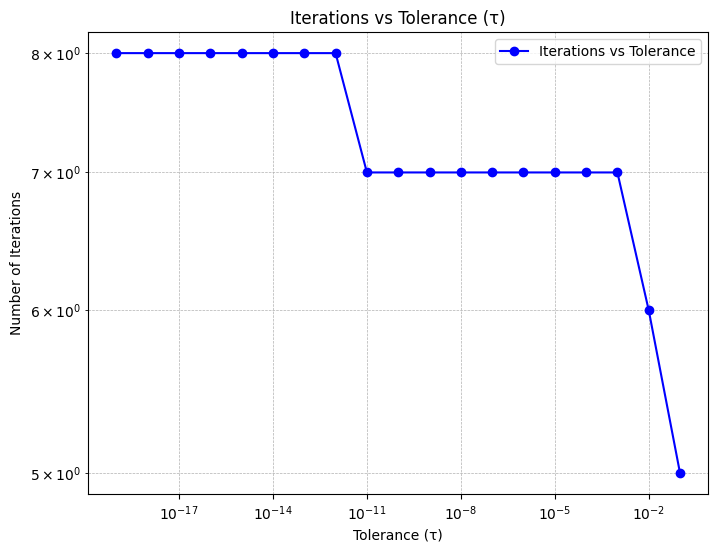

In [21]:
x_range = np.arange(-5,5,0.1)
y_range = np.arange(-5,5,0.1)

X,Y = np.meshgrid(x_range,y_range)

Z = f(X,Y)

x_start , y_start = -1.5 , 1.5

x_dash ,y_dash ,f_dash ,history = gradient_descent(x_start , y_start )


In [22]:
print(f_dash)
print("Minimiser in x = ", x_dash)
print("Minimiser in y = ", y_dash)

0.0
Minimiser in x =  3.0
Minimiser in y =  9.0


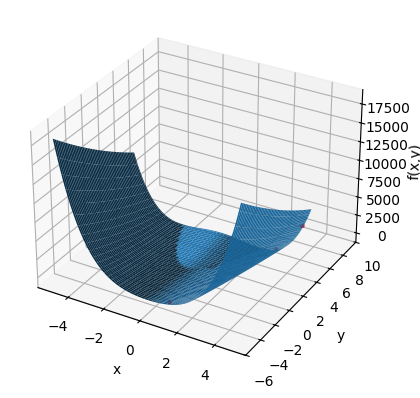

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)
ax.scatter(*zip(*history), c='r', marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()
